<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import pprint
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Load CSV file for SATS Score
sat_score_path = './sat_scores.csv'

with open(sat_score_path, 'r') as f:
    rows_sat = [row for row in csv.reader(f)]
f.close()

In [3]:
# Showhow does the data look like
rows_sat[0:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [4]:
# Separating Header and Data 
header = rows_sat[0]
data = rows_sat[1:]

In [5]:
# Create Dictionary with data 
sats_data = {header[i]: [row[i] for row in data ] for i in range(len(header))}

In [6]:
pprint.pprint(sats_data)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
# Make Pandas DataFrame Object with SAT Dict 
sat_dict_df = pd.DataFrame(sats_data)
sat_dict_df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [8]:
# Make Pandas DataFrame 
sat_df = pd.read_csv(sat_score_path)
sat_df.sample(5)

,State,Rate,Verbal,Math
21,HI,52,485,515
14,IN,60,499,501
0,CT,82,509,510
43,LA,7,564,562
31,TN,13,562,553


In [9]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### What is the difference between loading from file and inputting this dictionary (if any)?

In [10]:
# When we load data into a dataframe, the dataframe will automatically change the entries with 'x', where x is a numeric value into integers or float accordingly. 
# For dictionary, we'll have to manually change each entries into the type that we want.  

# To convert number data from string to float 
for head in header: 
    sats_data[head] = [int(val) if val[0].isdigit() == True
                       else val for val in sats_data[head]]
sat_dict_df = pd.DataFrame(sats_data)
sat_dict_df.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [12]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [13]:
sat_df.describe(include = 'all')

,State,Rate,Verbal,Math
count,52,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN
top,SD,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000
std,NaN,27.301788,33.236225,36.014975
min,NaN,4.000000,482.000000,439.000000
25%,NaN,9.000000,501.000000,504.000000
50%,NaN,33.500000,526.500000,521.000000
75%,NaN,63.500000,562.000000,555.750000


In [14]:
# SAT is a standardized test used for college admissions
# Tells us the average score by state 

In [15]:
description = {'State': 'Acronym that refers to the states of America.'\
               ,'Rate': 'Percentile of participation out of eligible candidates within the state'\
               ,'Verbal': 'Average score on Verbal section per state'\
               ,'Math': 'Average score on Math section per state'} 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [16]:
def datadict(dataframe):
    print 'Data shape is {}'.format(dataframe.shape)
    for head in dataframe.columns:
        print "{}'s Description: {}".format(head,description[head])
        print "    Its type is {}".format(sat_df[head].dtype)

In [17]:
datadict(sat_df)

Data shape is (52, 4)
State's Description: Acronym that refers to the states of America.
    Its type is object
Rate's Description: Percentile of participation out of eligible candidates within the state
    Its type is int64
Verbal's Description: Average score on Verbal section per state
    Its type is int64
Math's Description: Average score on Math section per state
    Its type is int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [18]:
def dist_plot(dataframe,column):
    data = dataframe[column]
    #ensure that each figure do not overlap
    plt.figure() 
    #plot the graph 
    ax = sns.distplot(data,bins=50,kde=False)
    ax.set_title("Distribution of "+column)
    ax.set_ylabel("Qty")
    ax.set_xlabel("Score")

    

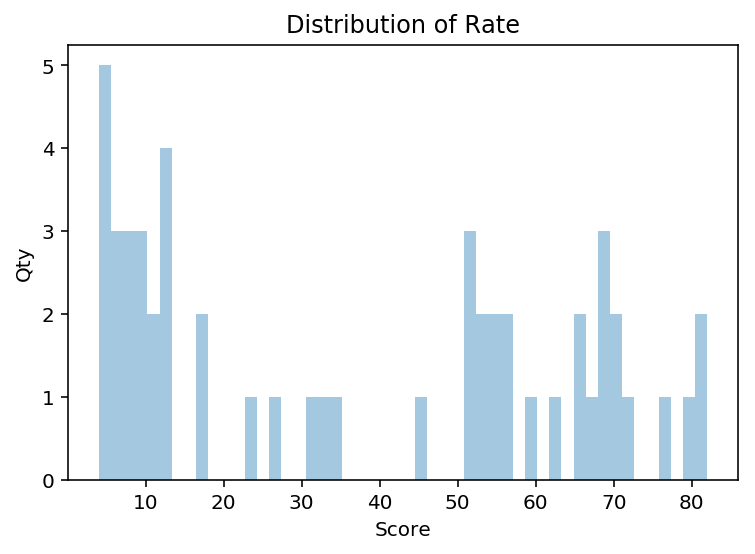

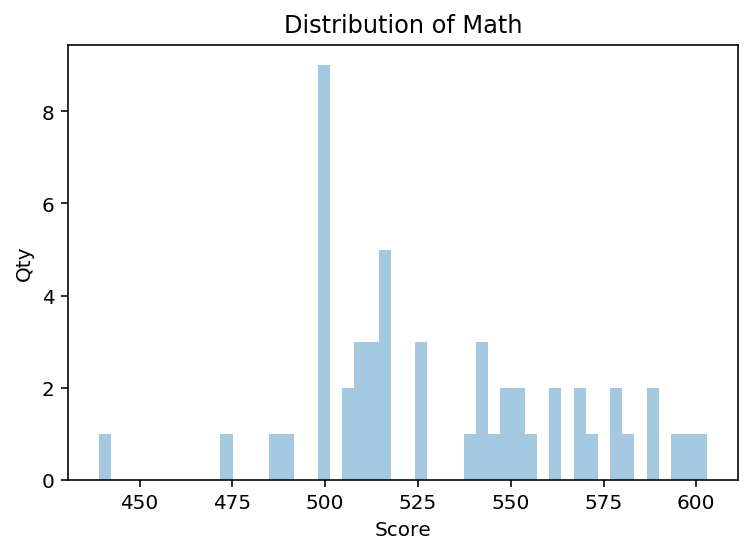

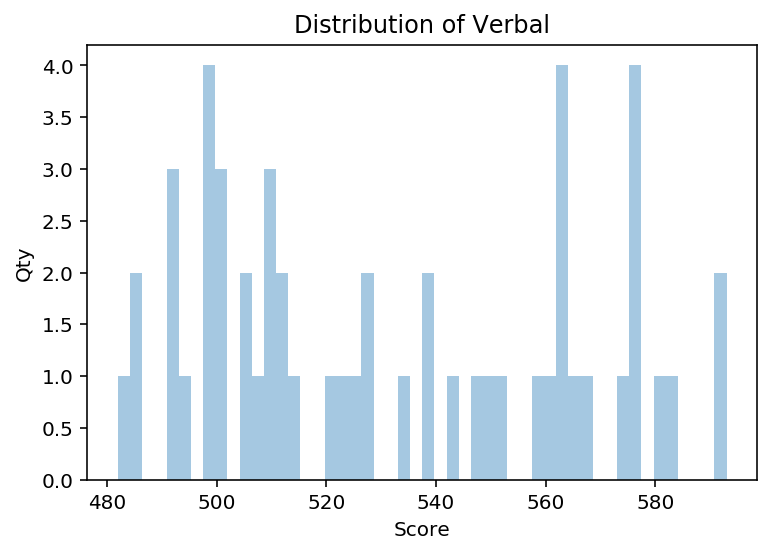

In [19]:
for col in ['Rate','Math','Verbal']:
    dist_plot(sat_df,col)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

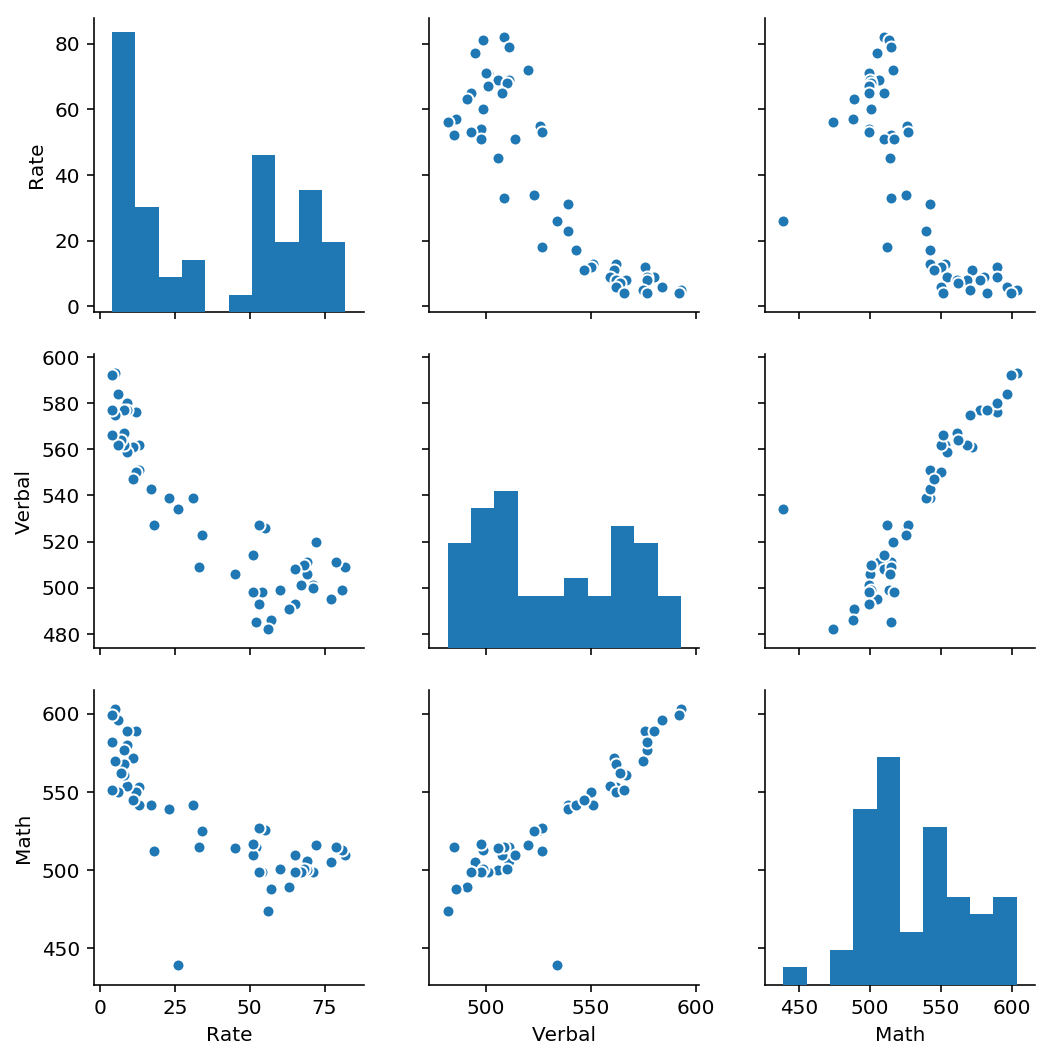

In [20]:
sns.pairplot(sat_df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

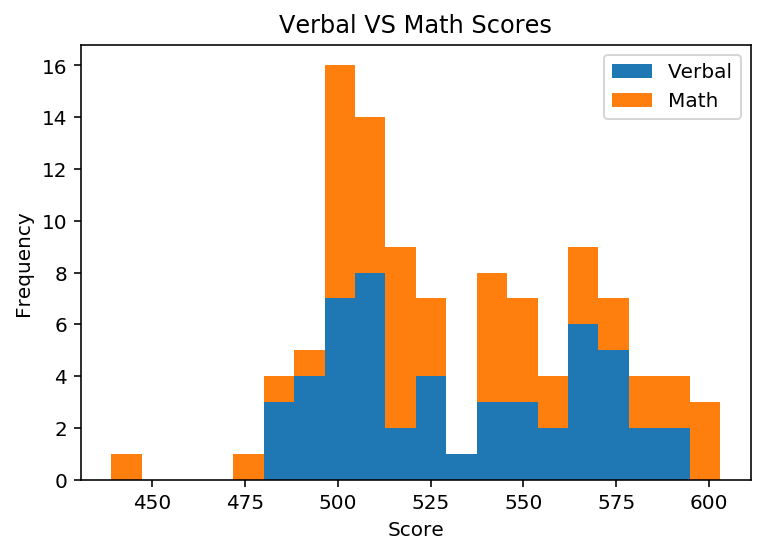

In [21]:
stacked_hist = sat_df[['Verbal','Math']].plot(kind='hist',stacked=True, bins = 20)
stacked_hist.set_title("Verbal VS Math Scores")
stacked_hist.set_xlabel("Score");

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

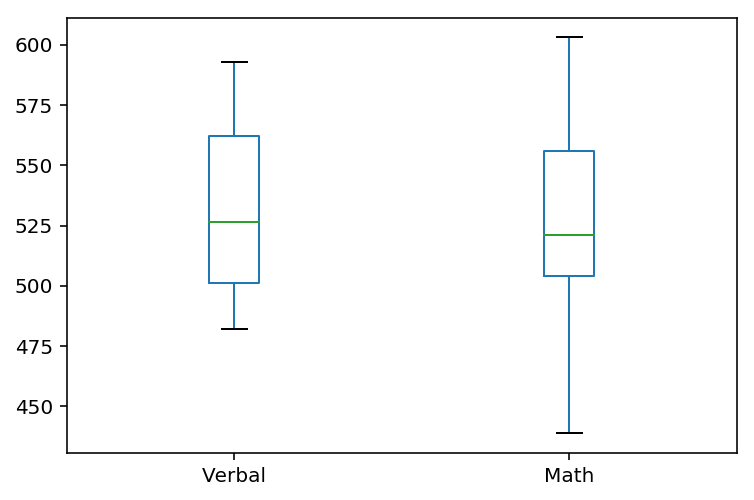

In [22]:
sat_df[['Verbal','Math']].plot(kind='box')

Text(0.5,1,u'Boxplot of Verbal and Math scores')

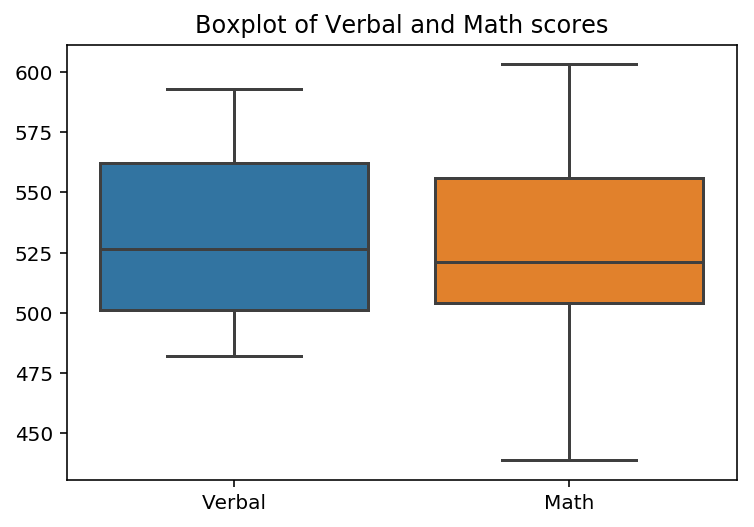

In [23]:
box_plotv2 = sns.boxplot(data = sat_df[['Verbal','Math']]);
box_plotv2.set_title("Boxplot of Verbal and Math scores")

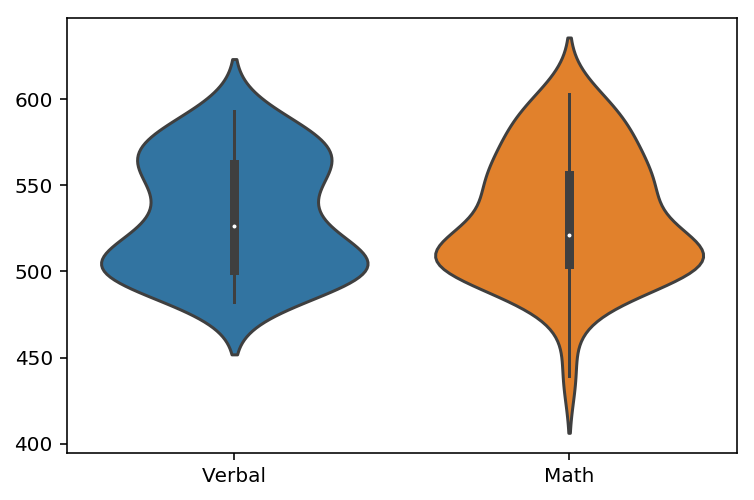

In [24]:
sns.violinplot(data = sat_df[['Verbal','Math']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [25]:
test_df = sat_df.copy()

In [26]:
def standardization(dataframe,col):
    data = dataframe[col]
    mean = np.mean(data)
    std = np.std(data)
    
    data = [(val-mean)/std for val in data]
    return data

In [27]:
for col in ['Math','Verbal','Rate']:
    test_df[col] = standardization(test_df,col)
    

In [28]:
test_df.sample(5)

,State,Rate,Verbal,Math
17,OR,0.660040,-0.182871,-0.154204
47,IA,-1.189210,1.852669,2.004654
28,MT,-0.523480,0.212084,0.210278
5,RI,1.251800,-0.942401,-0.911207
18,FL,0.623055,-1.033545,-0.911207


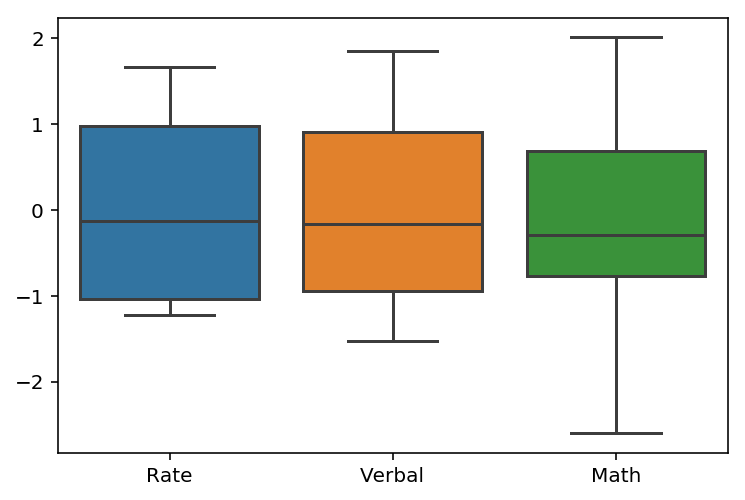

In [29]:
sns.boxplot(data = test_df[['Rate','Verbal','Math']]);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [30]:
states_greater_than_mean = list(sat_df[sat_df['Verbal']>np.mean(sat_df['Verbal'])]['State'])
print "List of states that have Verbal Score > Mean: \n{}".format(states_greater_than_mean)
print "No. of States with Verbal Scores > Mean: {}".format(len(states_greater_than_mean))
print "Total no. of States: {}".format(len(sat_df['Verbal']))

List of states that have Verbal Score > Mean: 
['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
No. of States with Verbal Scores > Mean: 24
Total no. of States: 52


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [31]:
states_greater_than_median = list(sat_df[sat_df['Verbal']>np.median(sat_df['Verbal'])]['State'])
print "List of states that have Verbal Score > Median: \n{}".format(states_greater_than_median)
print "No. of States with Verbal Scores > Median is {}".format(len(states_greater_than_median))
print "Total no. of States is {}".format(len(sat_df['Verbal']))

List of states that have Verbal Score > Median: 
['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
No. of States with Verbal Scores > Median is 26
Total no. of States is 52


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [35]:
diff = sat_df['Verbal'] - sat_df['Math']

In [37]:
sat_df
sat_df['Diff_VnM'] = diff
sat_df.sample(5)

,State,Rate,Verbal,Math,Diff_VnM
31,TN,13,562,553,9
10,DE,67,501,499,2
25,NV,33,509,515,-6
37,MN,9,580,589,-9
34,KY,12,550,550,0


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [41]:
V_greater_M = sat_df.sort_values(by = 'Diff_VnM').head(10)
V_greater_M.index = range(1,11)
V_greater_M.head(3)

,State,Rate,Verbal,Math,Diff_VnM
1,HI,52,485,515,-30
2,CA,51,498,517,-19
3,NJ,81,499,513,-14


In [42]:
M_greater_V = sat_df.sort_values(by = 'Diff_VnM',ascending = False).head(10)
M_greater_V.index = range(1,11)
M_greater_V.head(3)

,State,Rate,Verbal,Math,Diff_VnM
1,OH,26,534,439,95
2,MS,4,566,551,15
3,WV,18,527,512,15


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [52]:
sat_df[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [54]:
# include = 'all' includes string values 
sat_df.describe(include = 'all')

,State,Rate,Verbal,Math,Diff_VnM
count,52,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN
top,SD,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000,0.519231
std,NaN,27.301788,33.236225,36.014975,15.729939
min,NaN,4.000000,482.000000,439.000000,-30.000000
25%,NaN,9.000000,501.000000,504.000000,-6.000000
50%,NaN,33.500000,526.500000,521.000000,0.000000
75%,NaN,63.500000,562.000000,555.750000,4.250000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [56]:
sat_df[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


##### 1. Describe how the covariance matrix is different from the correlation matrix.

In [ ]:
# Covariance is a measure of how much two random variables vary together.

# The formula is:
# Cov(X,Y) = Σ E((X-μ)E(Y-ν)) / n-1 where:
# X is a random variable
# E(X) = μ is the expected value (the mean) of the random variable X and
# E(Y) = ν is the expected value (the mean) of the random variable Y
# n = the number of items in the data set



##### 2.What is the process to convert the covariance into the correlation?



##### 3.Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [ ]:
# A large covariance can mean a strong relationship between variables. However, you can’t compare variances over data sets with different scales (like pounds and inches). A weak covariance in one data set may be a strong one in a different data set with different scales.

# The main problem with interpretation is that the wide range of results that it takes on makes it hard to interpret. For example, your data set could return a value of 3, or 3,000. This wide range of values is cause by a simple fact; The larger the X and Y values, the larger the covariance. 
# Covariance can take on practically any number while a correlation is limited: -1 to +1.
# Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
# Correlation does not have units. Covariance always has units
# Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [57]:
drug = pd.read_csv('./drug-use-by-age.csv')

In [59]:
drug.sample(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0


In [61]:
# There are 17 rows
drug.shape

(17, 28)

In [63]:
#There are no null values
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [60]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [ ]:
# From the information above, these are the columns we should clean 
# age                        17 non-null object --> should be int/float
# cocaine-frequency          17 non-null object  --> should be int/float
# crack-frequency            17 non-null object --> should be int/float
# heroin-frequency           17 non-null object --> should be int/float
# inhalant-frequency         17 non-null object --> should be int/float
# oxycontin-frequency        17 non-null object --> should be int/float
# meth-frequency             17 non-null object --> should be int/float

In [64]:
# Clean up age column 
drug['age'].unique

<bound method Series.unique of 0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object>

In [ ]:
# It turns out that the column 'age' is categorical instead.
# It doesn't make sense to split the values into the specific ages as they have been aggregated
# Conclusion: keep age as string object 

In [96]:
for col in ['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']:
    print col
    print drug[col].unique(), '\n'

cocaine-frequency
[ 5.   1.   5.5  4.   7.   8.   6.  15.  36.   0. ] 

crack-frequency
[ 0.   3.   9.5  1.  21.  10.   2.   5.  17.   6.  15.  48.  62. ] 

heroin-frequency
[ 35.5   0.    2.    1.   66.5  64.   46.  180.   45.   30.   57.5  88.
  50.   66.  280.   41.  120. ] 

inhalant-frequency
[19.  12.   5.   5.5  3.   4.   2.   3.5 10.  13.5  0. ] 

oxycontin-frequency
[24.5 41.   4.5  3.   4.   6.   7.   7.5 12.  13.5 17.5 20.  46.   5.
  0. ] 

meth-frequency
[  0.    5.   24.   10.5  36.   48.   12.  105.    2.   46.   21.   30.
  54.  104. ] 



In [ ]:
# It turns out that '-' are causing the data to become string

In [97]:
for col in ['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']:
    drug[col] = [0.0 if val == '-' else float(val) for val in drug[col]]

In [98]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [34]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.